classification model that can identify a good dead lift from a bad one

In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import imageio
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import PIL
import cv2
import os
import anvil
from keras.preprocessing.image import load_img, img_to_array
tf.__version__

'1.8.0'

In [3]:
DirectoryGoodLift = './GoodDeadLift'
DirectoryBadLift = './BadDeadLift'
TestGoodDir = './GoodTest'
TestBadDir = './BadTest'

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

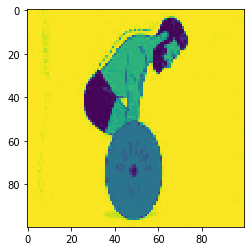

In [5]:
GoodDead = []
BadDead = []
GoodTest = []
BadTest = []
for filename in os.listdir(DirectoryGoodLift):
    #print(filename)
    pic = imageio.imread(DirectoryGoodLift+"/"+filename)
    dimension = (100, 100)
    pic = cv2.resize(pic, dimension)
    pic = rgb2gray(pic)/255
    #pic = cv2.resize(pic, dimension)
    GoodDead += [pic]
    plt.imshow(pic)
    #plt.show()
for filename in os.listdir(DirectoryBadLift):
    #print(filename)
    pic = imageio.imread(DirectoryBadLift+"/"+filename)
    dimension = (100, 100)
    pic = cv2.resize(pic, dimension)
    pic = rgb2gray(pic)/255
    #pic = cv2.resize(pic, dimension)
    BadDead += [pic]
    plt.imshow(pic)
    #plt.show()
for filename in os.listdir(TestGoodDir):
    #print(filename)
    pic = imageio.imread(TestGoodDir+"/"+filename)
    dimension = (100, 100)
    pic = cv2.resize(pic, dimension)
    pic = rgb2gray(pic)/255
    #pic = cv2.resize(pic, dimension)
    GoodTest += [pic]
    plt.imshow(pic)
for filename in os.listdir(TestBadDir):
    #print(filename)
    pic = imageio.imread(TestBadDir+"/"+filename)
    dimension = (100, 100)
    pic = cv2.resize(pic, dimension)
    pic = rgb2gray(pic)/255
    #pic = cv2.resize(pic, dimension)
    BadTest += [pic]
    plt.imshow(pic)

In [6]:
train_data_images = GoodDead+BadDead
train_data_labels = [1]*27 +[0]*26
train_df = pd.DataFrame({'Image':train_data_images, 'Proper':train_data_labels})
#train_df

test_data_images = GoodTest+BadTest
test_data_labels = [1]*5+[0]*5
test_df = pd.DataFrame({'Image':test_data_images, 'Proper':test_data_labels})
train_df.head()

,Image,Proper
0,"[[0.43226901960784314, 0.4283478431372549, 0.4...",1
1,"[[0.1408419607843137, 0.6765929411764705, 0.08...",1
2,"[[0.9998999999999999, 0.9998999999999999, 0.99...",1
3,"[[0.45495882352941175, 0.4632482352941176, 0.4...",1
4,"[[0.01988392156862745, 0.023805098039215686, 0...",1


In [7]:
train_x = np.array([el.tolist() for el in train_df['Image']])
train_y = np.array([el for el in train_df['Proper']])
test_x = np.array([el.tolist() for el in test_df['Image']])
test_y = np.array([el for el in test_df['Proper']])
print(train_x.shape, test_x.shape)

#type(train_df['Image'][0])
#train_x

(53, 100, 100) (10, 100, 100)


In [8]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(100, 100)), 
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(60, activation=tf.nn.relu),
                          keras.layers.Dense(40, activation=tf.nn.relu),
                          keras.layers.Dense(2, activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(train_x, train_y, epochs=10) #

Epoch 1/10
53/53 [==============================] - 0s 828us/step - loss: 0.0317 - acc: 0.9811
Epoch 2/10
53/53 [==============================] - 0s 669us/step - loss: 0.0353 - acc: 0.9811
Epoch 3/10
53/53 [==============================] - 0s 654us/step - loss: 0.0340 - acc: 0.9811
Epoch 4/10
53/53 [==============================] - 0s 641us/step - loss: 0.0371 - acc: 0.9623
Epoch 5/10
53/53 [==============================] - 0s 671us/step - loss: 0.0294 - acc: 0.9811
Epoch 6/10
53/53 [==============================] - 0s 625us/step - loss: 0.0283 - acc: 0.9811
Epoch 7/10
53/53 [==============================] - 0s 620us/step - loss: 0.0296 - acc: 0.9811
Epoch 8/10
53/53 [==============================] - 0s 675us/step - loss: 0.0340 - acc: 0.9623
Epoch 9/10
53/53 [==============================] - 0s 631us/step - loss: 0.0282 - acc: 0.9811
Epoch 10/10
53/53 [==============================] - 0s 664us/step - loss: 0.0320 - acc: 0.9623


In [34]:
test_loss, test_acc = model.evaluate(test_x, test_y)
test_acc

10/10 [==============================] - 0s 350us/step


0.699999988079071

In [35]:
#model.predict(test_x[9:])
#test_x[9:].shape
model._make_predict_function()

In [36]:
anvil.server.connect('ZKUXXJZX4XT6552OOHXWY3YI-TKCPIIRKFAYP42XL')

In [37]:
import anvil.media

@anvil.server.callable
def is_proper(image):
    #print('hello from uplink')
    #return (str(type(image)), 1)
    with anvil.media.TempFile(image) as filename:
        #img = imageio.imread(filename)
        img = load_img(filename)
    img = img.resize((100, 100), resample=PIL.Image.BICUBIC) #this 
    #img = cv2.resize(img, (128, 128))
    #pic = imageio.imread(DirectoryBadLift+"/"+filename)
    #img = rgb2gray(pic)/255
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = rgb2gray(img)/255
    #score = img.shape
    model._make_predict_function()
    score = model.predict(img)[0][0]
    if score < .5:
        return ("you're doing it correct! :)", score)
    else:
        return ("you're doing it wrong :(", score)
#anvil.server.wait_forever()

In [145]:
!pip install anvil

In [146]:
!pip install anvil-uplink

#attempted to use tf-pose-estimation package. There were incompatabilities due to tensorflow 2.1 update. 

In [21]:
!pip install tf_pose

In [19]:
import tf_pose
coco_style = tf_pose.infer('./BadDeadLift/download (4).jpeg')
type(coco_style)

1.8.0
**** Failed to initialize TensorRT. This is either because the TensorRT installation path is not in LD_LIBRARY_PATH, or because you do not have it installed. If not installed, please go to https://developer.nvidia.com/tensorrt to download and install TensorRT ****


NotFoundError: libnvinfer.so.4: cannot open shared object file: No such file or directory

In [42]:
%tb

SystemExit: 2

In [45]:
!ls

BadDeadLift	__init__.py  models		run_video.py
CMakeLists.txt	build	     msg		run_webcam.py
Coach.ipynb	dist	     package.xml	scripts
Dockerfile	docker	     requirements.txt	setup.py
GoodDeadLift	etcs	     run.py		tf_pose
LICENSE		images	     run_checkpoint.py	tf_pose.egg-info
README.md	launch	     run_directory.py


In [21]:
!python run.py --image=images/validperson1.jpeg

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "run.py", line

In [36]:
!python run.py --model=mobilenet_thin --resize=432x368 --image=./images/p1.jpg

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "run.py", line

In [30]:
!pip3 install -r requirements.txt

  Cloning https://github.com/ppwwyyxx/tensorpack.git to /tmp/pip-req-build-ruxh3e9j
  Running command git clone -q https://github.com/ppwwyyxx/tensorpack.git /tmp/pip-req-build-ruxh3e9j
  Created wheel for tensorpack: filename=tensorpack-0.10-py2.py3-none-any.whl size=290958 sha256=62cdf74ca0671bd74dc3eb812f52c8ece3ef7fc1717e0cb7bab24168a338ef51
  Stored in directory: /tmp/pip-ephem-wheel-cache-06j9f3yz/wheels/75/5c/ed/5bb9487a4466e63984140b9563f3cfb62eaab4194eda5f3ea5
Successfully built tensorpack


In [25]:
!python setup.py install

--2020-04-17 22:00:46--  http://download692.mediafire.com/8qxvy8xdwtag/qlzzr20mpocnpa3/graph_opt.pb
Resolving download692.mediafire.com (download692.mediafire.com)... 205.196.120.140
Connecting to download692.mediafire.com (download692.mediafire.com)|205.196.120.140|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Retrying.

--2020-04-17 22:00:48--  (try: 2)  http://download692.mediafire.com/8qxvy8xdwtag/qlzzr20mpocnpa3/graph_opt.pb
Connecting to download692.mediafire.com (download692.mediafire.com)|205.196.120.140|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Giving up.

running install
running bdist_egg
running egg_info
writing tf_pose.egg-info/PKG-INFO
writing dependency_links to tf_pose.egg-info/dependency_links.txt
writing requirements to tf_pose.egg-info/requires.txt
writing top-level names to tf_pose.egg-info/top_level.txt
file pafprocess.py (for module pafprocess) not found
reading manifest file 'tf_pose.egg-info/SOUR

copying tf_pose.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf_pose.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf_pose.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf_pose.egg-info/not-zip-safe -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf_pose.egg-info/requires.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying tf_pose.egg-info/top_level.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
writing build/bdist.linux-x86_64/egg/EGG-INFO/native_libs.txt
creating 'dist/tf_pose-0.1.1-py3.6-linux-x86_64.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing tf_pose-0.1.1-py3.6-linux-x86_64.egg
removing '/usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg' (and everything under it)
creating /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg
Extracting tf_pose-0.1.1-py3.6-linux-x86_64.egg

In [33]:
!bash models/graph/cmu/download.sh

[download] model graph : cmu
--2020-04-17 21:25:33--  http://download692.mediafire.com/0r6ie55yy30g/qlzzr20mpocnpa3/graph_opt.pb
Resolving download692.mediafire.com (download692.mediafire.com)... 205.196.120.140
Connecting to download692.mediafire.com (download692.mediafire.com)|205.196.120.140|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Retrying.

--2020-04-17 21:25:34--  (try: 2)  http://download692.mediafire.com/0r6ie55yy30g/qlzzr20mpocnpa3/graph_opt.pb
Connecting to download692.mediafire.com (download692.mediafire.com)|205.196.120.140|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Giving up.

[download] end


In [ ]:
!python run.py --model=mobilenet_thin --resize=432x368 --image=images/p1.jpg

In [20]:
!apt-key adv --fetch-keys \http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda

Executing: /tmp/apt-key-gpghome.IM7PfJyi9k/gpg.1.sh --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
gpg: requesting key from 'http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub'
gpg: key F60F4B3D7FA2AF80: "cudatools <cudatools@nvidia.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Hit:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease        
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease          
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done                      
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package cuda


In [32]:
!pip install slidingwindow

In [30]:
!apt-get install -y swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.


In [31]:
!swig -python -c++ tf_pose/pafprocess/pafprocess.i && python tf_pose/pafprocess/setup.py build_ext --inplace

running build_ext
building '_pafprocess' extension
swigging pafprocess.i to pafprocess_wrap.cpp
swig -python -c++ -o pafprocess_wrap.cpp pafprocess.i
Unable to find file 'pafprocess.i'.
error: command 'swig' failed with exit status 1


In [160]:
#!python tf_pose/pafprocess/setup.py build_ext --inplace

running build_ext
building '_pafprocess' extension
swigging pafprocess.i to pafprocess_wrap.cpp
swig -python -c++ -o pafprocess_wrap.cpp pafprocess.i
Unable to find file 'pafprocess.i'.
error: command 'swig' failed with exit status 1


In [28]:
!apt-get install -y libllvm-7-ocaml-dev libllvm7 llvm-7 llvm-7-dev llvm-7-doc llvm-7-examples llvm-7-runtime

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libllvm7 is already the newest version (1:7-3~ubuntu0.18.04.1).
libllvm-7-ocaml-dev is already the newest version (1:7-3~ubuntu0.18.04.1).
llvm-7 is already the newest version (1:7-3~ubuntu0.18.04.1).
llvm-7-dev is already the newest version (1:7-3~ubuntu0.18.04.1).
llvm-7-doc is already the newest version (1:7-3~ubuntu0.18.04.1).
llvm-7-examples is already the newest version (1:7-3~ubuntu0.18.04.1).
llvm-7-runtime is already the newest version (1:7-3~ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.


In [29]:
!export LLVM_CONFIG=/usr/bin/llvm-config-7

In [43]:
!apt-get update
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Hit:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease                  
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 1s (217 kB/s)   
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.


In [26]:
!pip install opencv-python

In [24]:
!pip install imageio

In [23]:
!pip install -upgrade pip


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [49]:
!pip3 uninstall -y tensorflow

Found existing installation: tensorflow 1.4.1
Uninstalling tensorflow-1.4.1:
  Successfully uninstalled tensorflow-1.4.1


In [50]:
!pip uninstall -y tensorflow-gpu

Found existing installation: tensorflow-gpu 1.8.0
Uninstalling tensorflow-gpu-1.8.0:
  Successfully uninstalled tensorflow-gpu-1.8.0


In [62]:
!pip install --ignore-installed tensorflow==1.8.0

     |████████████████████████████████| 49.1 MB 336 kB/s  eta 0:00:01
  Using cached tensorboard-1.8.0-py3-none-any.whl (3.1 MB)
Processing /root/.cache/pip/wheels/c3/af/84/3962a6af7b4ab336e951b7877dcfb758cf94548bb1771e0679/absl_py-0.9.0-py3-none-any.whl
  Using cached six-1.14.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.18.2-cp36-cp36m-manylinux1_x86_64.whl (20.2 MB)
  Using cached protobuf-3.11.3-cp36-cp36m-manylinux1_x86_64.whl (1.3 MB)
Processing /root/.cache/pip/wheels/93/2a/eb/e58dbcbc963549ee4f065ff80a59f274cc7210b6eab962acdc/termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.28.1-cp36-cp36m-manylinux2010_x86_64.whl (2.8 MB)
  Using cached wheel-0.34.2-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached bleach-1.5.0-py2.py3-none-any.whl (17 kB)
Processing /root/.cache/pip/wheels/90/1c/cb/a87fd097ff74648ecc468a703001f6c7c86d8a71d459e65c98/html5lib-0.9999999-py3-

In [2]:
!pip install tensorflow==1.4.1

  Using cached tensorflow-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (41.2 MB)


In [46]:
!pip install --ignore-installed tensorflow-gpu==1.8.0

  Using cached tensorflow_gpu-1.8.0-cp36-cp36m-manylinux1_x86_64.whl (216.2 MB)
  Using cached grpcio-1.28.1-cp36-cp36m-manylinux2010_x86_64.whl (2.8 MB)
  Using cached protobuf-3.11.3-cp36-cp36m-manylinux1_x86_64.whl (1.3 MB)
  Using cached six-1.14.0-py2.py3-none-any.whl (10 kB)
  Using cached wheel-0.34.2-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
Processing /root/.cache/pip/wheels/93/2a/eb/e58dbcbc963549ee4f065ff80a59f274cc7210b6eab962acdc/termcolor-1.1.0-py3-none-any.whl
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
Processing /root/.cache/pip/wheels/c3/af/84/3962a6af7b4ab336e951b7877dcfb758cf94548bb1771e0679/absl_py-0.9.0-py3-none-any.whl
  Using cached numpy-1.18.2-cp36-cp36m-manylinux1_x86_64.whl (20.2 MB)
  Using cached tensorboard-1.8.0-py3-none-any.whl (3.1 MB)
  Using cached setuptools-46.1.3-py3-none-any.whl (582 kB)
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
Processing /root/.cache/pip/wheels/90/1c/cb/a8

In [ ]:
!pip install dill==0.2.7.1

In [17]:
!pip uninstall -y tensorflow==1.8.0

Found existing installation: tensorflow 1.4.1
Uninstalling tensorflow-1.4.1:
  Successfully uninstalled tensorflow-1.4.1


In [23]:
tf.__version__

'1.8.0'

In [24]:
import tensorflow as tf

In [33]:
!pip uninstall -y tensorflow

In [1]:
!pip install tensorflow==2.1

     |████████████████████████████████| 421.8 MB 30 kB/s s eta 0:00:01   |██████▏                         | 80.9 MB 9.7 MB/s eta 0:00:36
     |████████████████████████████████| 63 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 448 kB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 38.4 MB/s eta 0:00:01     |███████████████████████▊        | 19.3 MB 38.4 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 35.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 377 kB/s eta 0:00:01
     |████████████████████████████████| 147 kB 37.0 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=25ab384de64726ac0912fefb48faade1d7a707892f4662248f7c0c4334e11c62
  Stored in directory: /root/.cache/pip/wheels/19/a7/b9/0740c7a3a7d1d348f04823339274b90de25fbcd217b2

In [159]:
!pip install keras==2.1.5

     |████████████████████████████████| 334 kB 13.1 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


using GANS to generate more images (code from open source blog)

In [25]:
BATCH_SIZE = 2
BUFFER_SIZE = 10
EPOCHES = 5
OUTPUT_DIR = "./BadDeadlift"
#OUTPUT_DIR = "./GoodDeadlift" # The output directory where the images of the generator a stored during training

In [26]:
class Generator(keras.Model):
    
    def __init__(self, random_noise_size = 100):
        super().__init__(name='generator')
        #layers
        self.input_layer = keras.layers.Dense(units = random_noise_size)
        self.dense_1 = keras.layers.Dense(units = 128)
        self.leaky_1 =  keras.layers.LeakyReLU(alpha = 0.01)
        self.dense_2 = keras.layers.Dense(units = 128)
        self.leaky_2 = keras.layers.LeakyReLU(alpha = 0.01)
        #self.dense_3 = keras.layers.Dense(units = 256)
        #self.leaky_3 = keras.layers.LeakyReLU(alpha = 0.01)
        self.output_layer = keras.layers.Dense(units=10000, activation = "tanh")
        #print('initialized generator')
        
    def call(self, input_tensor):
        ## Definition of Forward Pass
        x = self.input_layer(input_tensor)
        x = self.dense_1(x)
        x = self.leaky_1(x)
        x = self.dense_2(x)
        x = self.leaky_2(x)
        #x = self.dense_3(x)
        #x = self.leaky_3(x)
        #print('called from generator')
        return  self.output_layer(x)
    
    def generate_noise(self,batch_size, random_noise_size):
        return np.random.uniform(-1,1, size = (batch_size, random_noise_size))

In [27]:
generator = Generator()

In [28]:
cross_entropy = keras.losses.BinaryCrossentropy(from_logits = True)

def generator_objective(dx_of_gx):
    # Labels are true here because generator thinks he produces real images. 
    #print('generator objective')
    return cross_entropy(tf.ones_like(dx_of_gx), dx_of_gx)

AttributeError: module 'tensorflow.tools.api.generator.api.keras.losses' has no attribute 'BinaryCrossentropy'

In [60]:
class Discriminator(keras.Model):
    def __init__(self):
        super().__init__(name = "discriminator")
        
        #Layers
        self.input_layer = keras.layers.Dense(units = 10000)
        self.dense_1 = keras.layers.Dense(units = 128)
        self.leaky_1 =  keras.layers.LeakyReLU(alpha = 0.01)
        self.dense_2 = keras.layers.Dense(units = 128)
        self.leaky_2 = keras.layers.LeakyReLU(alpha = 0.01)
        #self.dense_3 = keras.layers.Dense(units = 128)
        #self.leaky_3 = keras.layers.LeakyReLU(alpha = 0.01)
        #print('initialized discriminator')
        
        self.logits = keras.layers.Dense(units = 1)  # This neuron tells us if the input is fake or real
    def call(self, input_tensor):
        #print('first discriminator call')
          ## Definition of Forward Pass
        x = self.input_layer(input_tensor)
        x = self.dense_1(x)
        x = self.leaky_1(x)
        x = self.leaky_2(x)
        #x = self.leaky_3(x)
        #x = self.leaky_3(x)
        x = self.logits(x)
        #print('called from discriminator')
        return x

In [61]:
discriminator = Discriminator()

In [62]:
def discriminator_objective(d_x, g_z, smoothing_factor = 0.9):
    """
    d_x = real output
    g_z = fake output
    """
    real_loss = cross_entropy(tf.ones_like(d_x) * smoothing_factor, d_x) # If we feed the discriminator with real images, we assume they all are the right pictures --> Because of that label == 1
    fake_loss = cross_entropy(tf.zeros_like(g_z), g_z) # Each noise we feed in are fakes image --> Because of that labels are 0
    
    total_loss = real_loss + fake_loss
    #print('discriminator objective')
    
    return total_loss

In [63]:
generator_optimizer = keras.optimizers.RMSprop()
discriminator_optimizer = keras.optimizers.RMSprop()

In [64]:
#@tf.function()
def training_step(generator: Discriminator, discriminator: Discriminator, images:np.ndarray , k:int =1, batch_size = 32):
    for _ in range(k):
         with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            #print('here in ts')
            noise = generator.generate_noise(batch_size, 100)
            #print('here in ts')
            g_z = generator(noise)
            #print('here in ts')
            d_x_true = discriminator(images) # Trainable?
            #print('here in ts')
            d_x_fake = discriminator(g_z) # dx_of_gx
            #print('here in ts')
            discriminator_loss = discriminator_objective(d_x_true, d_x_fake)
            #print('here in ts')
            # Adjusting Gradient of Discriminator
            gradients_of_discriminator = disc_tape.gradient(discriminator_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables)) # Takes a list of gradient and variables pairs
            #print('now here in ts')
              
            generator_loss = generator_objective(d_x_fake)
            # Adjusting Gradient of Generator
            gradients_of_generator = gen_tape.gradient(generator_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) 
            #print('training step done')

In [65]:
seed = np.random.uniform(-1,1, size = (1, 100)) # generating some noise for the training

In [77]:
def training(dataset, epoches):
    for epoch in range(epoches):
        #print('next epoch')
        for batch in dataset: 
            training_step(generator, discriminator, batch, batch_size = BATCH_SIZE, k = 1)
            #print('next batch')
            
        ## After ith epoch plot image 
        if (epoch % 50) == 0: 
            fake_image = tf.reshape(generator(seed), shape = (100,100))
            print("{}/{} epoches".format(epoch, epoches))
            plt.imshow(fake_image, cmap = "gray")
            #plt.imsave("{}/{}.png".format(OUTPUT_DIR,epoch),fake_image, cmap = "gray")

In [78]:
gans_train_prop = np.array(list(train_df[train_df['Proper']==1]['Image']))
gans_train_improp = np.array(list(train_df[train_df['Proper']==0]['Image']))

In [79]:
train_dataset_good = tf.data.Dataset.from_tensor_slices(gans_train_prop.reshape(gans_train_prop.shape[0],10000)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [80]:
train_dataset_bad = tf.data.Dataset.from_tensor_slices(gans_train_improp.reshape(gans_train_improp.shape[0],10000)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

0/5 epoches


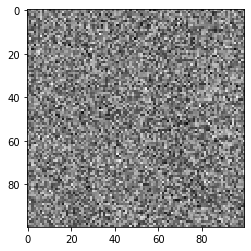

In [81]:
training(train_dataset_bad, EPOCHES)

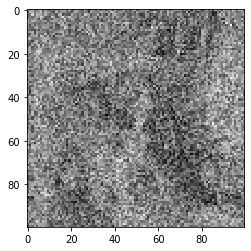

In [82]:
fake_image = generator(np.random.uniform(-1,1, size = (1, 100)))
plt.imshow(tf.reshape(fake_image, shape = (100,100)), cmap="gray")
#plt.imshow(fake_image)